In [1]:
!pip install unidecode

In [38]:
!pip install numpy

In [40]:
!pip install mapclassify

In [ ]:
#EJERCICIO 1 

In [2]:
# Tabla de datos
import pandas as pd
import os

datadis=pd.read_excel(os.path.join('data','indicadores_Peru.xls'),dtype={'Ubigeo': object})
datadis.head() 

,Ubigeo,Departamento,Provincia,Distrito,Poblacion,Superficie,hogares_saneamiento_pct,poblacion_pobreza_PCT,viviendas_con_servicio_de_luz
0,10202,Amazonas,Bagua,ARAMANGO,10940,"809,07",61.44,25.576,78.372
1,10201,Amazonas,Bagua,BAGUA,26091,"150,99",89.46,36.784,24.750
2,10302,Amazonas,Bongara,CHISQUILLA,335,"174,96",88.20,36.280,44.064
3,10102,Amazonas,Chachapoyas,ASUNCION,288,"25,71",73.42,30.368,57.303
4,10103,Amazonas,Chachapoyas,BALSAS,1644,"357,09",89.80,36.920,46.188


In [3]:
#Mapa
os.environ['USE_PYGEOS'] = '0'

import geopandas as gpd

# dataDisMap=gpd.read_file(os.path.join('maps','DistritosMap'))
dataDisMap = gpd.read_file(os.path.join("maps","DistritosMap","DISTRITOS1874.shp"))
dataDisMap.head()

,DEPARTAMEN,PROVINCIA,DISTRITO,INSTITUCIO,geometry
0,TACNA,TACNA,CORONEL GREGORIO ALBARRACIN LANCHIPA,IGN,"POLYGON ((-70.17413 -18.12896, -70.17461 -18.1..."
1,TACNA,TACNA,POCOLLAY,IGN,"POLYGON ((-69.93475 -17.92557, -69.90467 -17.9..."
2,TACNA,TACNA,CALANA,IGN,"POLYGON ((-70.11604 -17.91106, -70.11457 -17.9..."
3,TACNA,TACNA,TACNA,IGN,"POLYGON ((-70.31490 -17.94498, -70.30682 -17.9..."
4,TACNA,TACNA,SAMA,IGN,"POLYGON ((-70.42497 -17.88934, -70.48022 -17.9..."


In [4]:
#PreProcessing 

In [12]:
#str.upper: función que transforma el contenido de las columnas en mayúsculas
#str.strip: función que elimina espacios en blanco al principio y al final de cada valor

capitalizeColumns=lambda x: x.str.upper().str.strip()

datadis[['Departamento','Provincia']]=datadis[['Departamento','Provincia']].apply(capitalizeColumns)
dataDisMap[['DEPARTAMEN','PROVINCIA']]=dataDisMap[['DEPARTAMEN','PROVINCIA']].apply(capitalizeColumns)

In [13]:
import unidecode
#unidecode.unidecode() elimina acentos y diacríticos 
byePunctuation=lambda x: unidecode.unidecode(x)

datadis[['Departamento','Provincia']]=datadis[['Departamento','Provincia']].applymap(byePunctuation)
dataDisMap[['DEPARTAMEN','PROVINCIA']]=dataDisMap[['DEPARTAMEN','PROVINCIA']].applymap(byePunctuation)

In [14]:
len(datadis.Provincia),len(dataDisMap.PROVINCIA)

(280, 1874)

In [15]:
# contamos los duplicados en las columnas "Provincia" y "PROVINCIA" de los df
datadis.Provincia.duplicated().sum(), dataDisMap.PROVINCIA.duplicated().sum()

(114, 1678)

In [16]:
# concatenación de columnas 
datadis['DepartProv'] = ["+".join(pd) for pd in zip (datadis.Departamento, datadis.Provincia)]
dataDisMap['DepartProv'] = ["+".join(pd) for pd in zip (dataDisMap.DEPARTAMEN, dataDisMap.PROVINCIA)]

In [17]:
datadis['DepartProv'].head()

0          AMAZONAS+BAGUA
1          AMAZONAS+BAGUA
2        AMAZONAS+BONGARA
3    AMAZONAS+CHACHAPOYAS
4    AMAZONAS+CHACHAPOYAS
Name: DepartProv, dtype: object

In [18]:
# reemplazamos: guiones, espacios múltiples -> espacio simple
datadis.DepartProv = datadis.DepartProv.str.replace("\-|\_|\s+"," ",regex=True)
dataDisMap.DepartProv = dataDisMap.DepartProv.str.replace("\-|\_|\s+"," ",regex=True)

In [19]:
#muestro la tabla
datadis

,Ubigeo,Departamento,Provincia,Distrito,Poblacion,Superficie,hogares_saneamiento_pct,poblacion_pobreza_PCT,viviendas_con_servicio_de_luz,Dist$rito,DepartProv
0,10202,AMAZONAS,BAGUA,ARAMANGO,10940,"809,07",61.44,25.576,78.372,ARAMANGO,AMAZONAS+BAGUA
1,10201,AMAZONAS,BAGUA,BAGUA,26091,"150,99",89.46,36.784,24.750,BAGUA,AMAZONAS+BAGUA
2,10302,AMAZONAS,BONGARA,CHISQUILLA,335,"174,96",88.20,36.280,44.064,CHISQUILLA,AMAZONAS+BONGARA
3,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,288,"25,71",73.42,30.368,57.303,ASUNCION,AMAZONAS+CHACHAPOYAS
4,10103,AMAZONAS,CHACHAPOYAS,BALSAS,1644,"357,09",89.80,36.920,46.188,BALSAS,AMAZONAS+CHACHAPOYAS
...,...,...,...,...,...,...,...,...,...,...,...
275,240302,TUMBES,ZARUMILLA,AGUAS VERDES,24781,"46,06",80.35,33.140,43.488,AGUAS VERDES,TUMBES+ZARUMILLA
276,250204,UCAYALI,ATALAYA,YURUA,2716,"9175,58",69.40,28.760,40.824,YURUA,UCAYALI+ATALAYA
277,250101,UCAYALI,CORONEL PORTILLO,CALLERIA,159364,"10485,41",92.23,37.892,51.606,CALLERIA,UCAYALI+CORONEL PORTILLO
278,250301,UCAYALI,PADRE ABAD,PADRE ABAD,26614,"4689,2",59.06,24.624,86.445,PADRE ABAD,UCAYALI+PADRE ABAD


In [20]:
# Merging: combinar las dos tablas
nomatch_df = set(datadis.DepartProv)-set(dataDisMap.DepartProv)
nomatch_gdf = set(dataDisMap.DepartProv)-set(datadis.DepartProv)

In [21]:
len(nomatch_df), len(nomatch_gdf)

(3, 33)

In [22]:
# elijo la coincidencia que este más cerca a nomatch_gdf para un valor en nomatch_df
from thefuzz import process
[(dis,process.extractOne(dis,nomatch_gdf)) for dis in sorted(nomatch_df)]

[('HUANUCO+MARA+ ON', ('HUANUCO+MARANON', 90)),
 ('LAMBAYEQUE+FERRE+ AFE', ('LAMBAYEQUE+FERRENAFE', 93)),
 ('LORETO+DATEM DEL MARA+ ON', ('LORETO+DATEM DEL MARANON', 94))]

In [23]:
changes_df = {dis:process.extractOne(dis,nomatch_gdf)[0] for dis in sorted(nomatch_df)}

In [25]:
# reemplazo
datadis.DepartProv.replace(changes_df,inplace=True)

In [26]:
# proceso de merge 
dataDisMap = dataDisMap.merge(datadis, on='DepartProv')

In [27]:
# reviso la tabla "dataDisMap" ya mergeada 
dataDisMap.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3309 entries, 0 to 3308
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   DEPARTAMEN                     3309 non-null   object  
 1   PROVINCIA                      3309 non-null   object  
 2   DISTRITO                       3309 non-null   object  
 3   INSTITUCIO                     3309 non-null   object  
 4   geometry                       3309 non-null   geometry
 5   DepartProv                     3309 non-null   object  
 6   Ubigeo                         3309 non-null   object  
 7   Departamento                   3309 non-null   object  
 8   Provincia                      3309 non-null   object  
 9   Distrito                       3309 non-null   object  
 10  Poblacion                      3309 non-null   int64   
 11  Superficie                     3309 non-null   object  
 12  hogares_saneamiento_pct   

In [28]:
# elimino algunas columnas, que tienen nombre repetido
bye = ['Departamento', 'Provincia', 'Distrito','Dist$rito','INSTITUCIO']
dataDisMap.drop(columns=bye,inplace=True)

dataDisMap.head()

,DEPARTAMEN,PROVINCIA,DISTRITO,geometry,DepartProv,Ubigeo,Poblacion,Superficie,hogares_saneamiento_pct,poblacion_pobreza_PCT,viviendas_con_servicio_de_luz
0,MOQUEGUA,ILO,ILO,"POLYGON ((-71.33934 -17.62215, -71.33907 -17.6...",MOQUEGUA+ILO,180303,3319,"338,08",88.55,36.420,75.645
1,MOQUEGUA,ILO,EL ALGARROBAL,"POLYGON ((-71.25881 -17.44067, -71.25696 -17.4...",MOQUEGUA+ILO,180303,3319,"338,08",88.55,36.420,75.645
2,MOQUEGUA,ILO,PACOCHA,"POLYGON ((-71.43784 -17.24969, -71.43806 -17.2...",MOQUEGUA+ILO,180303,3319,"338,08",88.55,36.420,75.645
3,TACNA,TARATA,ESTIQUE PAMPA,"POLYGON ((-70.06805 -17.51975, -70.06760 -17.5...",TACNA+TARATA,230408,547,"347,06",93.46,38.384,55.305
4,TACNA,TARATA,ESTIQUE,"POLYGON ((-69.84819 -17.50783, -69.84942 -17.5...",TACNA+TARATA,230408,547,"347,06",93.46,38.384,55.305


In [29]:
# renombramiento 
rename = {'DEPARTAMEN': 'DEPARTAMENTO', 'hogares_saneamiento_pct':'HogSaneamPct', 'poblacion_pobreza_PCT':'PobPobrezaPct', 'viviendas_con_servicio_de_luz':'VivConLuzPct'}
dataDisMap.rename(columns=rename, inplace=True)

dataDisMap.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,geometry,DepartProv,Ubigeo,Poblacion,Superficie,HogSaneamPct,PobPobrezaPct,VivConLuzPct
0,MOQUEGUA,ILO,ILO,"POLYGON ((-71.33934 -17.62215, -71.33907 -17.6...",MOQUEGUA+ILO,180303,3319,"338,08",88.55,36.420,75.645
1,MOQUEGUA,ILO,EL ALGARROBAL,"POLYGON ((-71.25881 -17.44067, -71.25696 -17.4...",MOQUEGUA+ILO,180303,3319,"338,08",88.55,36.420,75.645
2,MOQUEGUA,ILO,PACOCHA,"POLYGON ((-71.43784 -17.24969, -71.43806 -17.2...",MOQUEGUA+ILO,180303,3319,"338,08",88.55,36.420,75.645
3,TACNA,TARATA,ESTIQUE PAMPA,"POLYGON ((-70.06805 -17.51975, -70.06760 -17.5...",TACNA+TARATA,230408,547,"347,06",93.46,38.384,55.305
4,TACNA,TARATA,ESTIQUE,"POLYGON ((-69.84819 -17.50783, -69.84942 -17.5...",TACNA+TARATA,230408,547,"347,06",93.46,38.384,55.305


In [32]:
#GUARDAR GPKG 

In [33]:
#EJERCICIO 2

In [35]:
# estadísticas de: HogSaneamPct
dataDisMap.HogSaneamPct.describe()

count    3309.000000
mean       80.668160
std        11.580376
min        52.530000
25%        72.820000
50%        81.950000
75%        91.260000
max        97.180000
Name: HogSaneamPct, dtype: float64

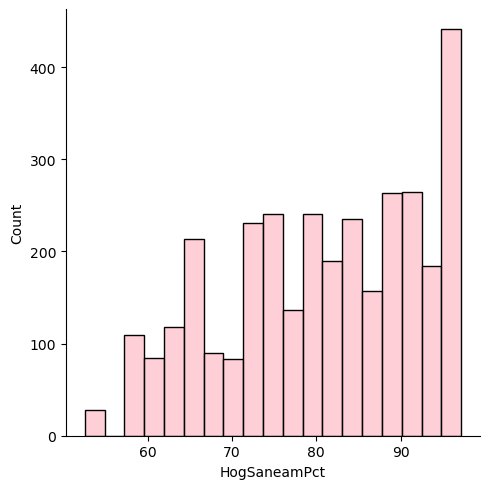

In [36]:
import seaborn as sea

sea.displot(dataDisMap.HogSaneamPct, color='pink')

In [37]:
sea.boxplot(dataDisMap.HogSaneamPct, color='pink', orient='h')

/Users/valeriaminano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HogSaneamPct'>

In [39]:
# para asegurarnos que los resultados sean consistentes:
import numpy as np
np.random.seed(12345)

In [41]:
import mapclassify 

In [42]:
#5 intervalos
K = 5

In [43]:
# mismo ancho de intervalo, fácil interpretación
ei5 = mapclassify.EqualInterval(dataDisMap['HogSaneamPct'], k=K)

In [44]:
msd = mapclassify.StdMean(dataDisMap['HogSaneamPct'])

In [45]:
q5 = mapclassify.Quantiles(dataDisMap['HogSaneamPct'], k=K)

In [46]:
mb5 = mapclassify.MaximumBreaks(dataDisMap['HogSaneamPct'], k=K)

In [47]:
ht = mapclassify.HeadTailBreaks(dataDisMap['HogSaneamPct'])

In [48]:
fj5 = mapclassify.FisherJenks(dataDisMap['HogSaneamPct'], k=K)

In [49]:
jc5 = mapclassify.JenksCaspall(dataDisMap['HogSaneamPct'], k=K)

In [50]:
#tabla de frecuencias por defecto
ht

HeadTailBreaks

   Interval      Count
----------------------
[52.53, 80.67] |  1575
(80.67, 90.10] |   845
(90.10, 94.32] |   404
(94.32, 95.89] |   333
(95.89, 97.04] |    81
(97.04, 97.18] |    71

In [51]:
np.unique(ht.yb,return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([1575,  845,  404,  333,   81,   71]))

In [52]:
pd.Series(ht.yb).value_counts()

0    1575
1     845
2     404
3     333
4      81
5      71
dtype: int64

In [53]:
ht.bins

array([80.66815956, 90.10224337, 94.31934758, 95.88713402, 97.04026316,
       97.18      ])

In [54]:
HT_bins = list(ht.bins)
HT_bins.insert(0,dataDisMap.HogSaneamPct.min())

In [55]:
sea.displot(dataDisMap.HogSaneamPct, bins=HT_bins,color='blue')

In [57]:
class5 = q5, ei5, msd, ht, mb5, fj5, jc5

# recolecto ADCM para cada clasificador
fits = np.array([ c.adcm for c in class5])

# convertir puntuaciones de ADCM en un df
adcms = pd.DataFrame(fits)

# agrego nombres de clasificadores
adcms['classifier'] = [c.name for c in class5]

# agrego nombres de columna al ADCM
adcms.columns = ['ADCM', 'Classifier']
ax = sea.barplot(y='Classifier', x='ADCM', data=adcms, palette='Pastel1')

In [58]:
dataDisMap['QU'] = q5.yb
dataDisMap['EI'] = ei5.yb
dataDisMap['FJ'] = fj5.yb

In [59]:
class5new = q5, ei5, fj5
pd.DataFrame({c.name: c.counts for c in class5new}, index=['Class-{}'.format(i) for i in range(5)])

,Quantiles,EqualInterval,FisherJenks
Class-0,683,221,643
Class-1,651,466,691
Class-2,666,763,666
Class-3,684,758,684
Class-4,625,1101,625


In [63]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(9, 9))

dataDisMap.plot(column='QU', 
                    cmap='viridis', 
                    categorical=True,
                    edgecolor='white', 
                    linewidth=0., 
                    alpha=0.75, 
                    legend=True,
                    legend_kwds=dict(loc=2),
                    ax=ax)

ax.set_axis_off()

dataDisMap.plot()

<AxesSubplot:>

In [65]:
#Quantiles: distribuir datos equitativamente en diferentes categorías

f, ax = plt.subplots(1, figsize=(9, 9))

dataDisMap.plot(column='HogSaneamPct', 
                      cmap='viridis',       
                      scheme='Quantiles',
                      k=5, 
                      edgecolor='white', 
                      linewidth=0.2, 
                      alpha=0.75, 
                      legend=True,
                      legend_kwds=dict(loc=2),
                      ax=ax)

ax.set_axis_off()

In [66]:
#EqualInterval:intervalos de ancho uniforme

f, ax = plt.subplots(1, figsize=(9, 9))

dataDisMap.plot(column='HogSaneamPct', 
                      cmap='viridis',       
                      scheme='EqualInterval',
                      k=5, 
                      edgecolor='white', 
                      linewidth=0.2, 
                      alpha=0.75, 
                      legend=True,
                      legend_kwds=dict(loc=2),
                      ax=ax)

ax.set_axis_off()

In [67]:
#FisherJenks: maximizar la diferenciación entre los grupos

f, ax = plt.subplots(1, figsize=(9, 9))

dataDisMap.plot(column='HogSaneamPct', 
                      cmap='viridis',       
                      scheme='FisherJenks',
                      k=5, 
                      edgecolor='white', 
                      linewidth=0.2, 
                      alpha=0.75, 
                      legend=True,
                      legend_kwds=dict(loc=2),
                      ax=ax)

ax.set_axis_off()